# Project: Regularization
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#assessing">Data Assessing</a></li>  
    <li><a href="#analysis">Data cleaning and EDA</a></li>
    <li><a href="#conclusion">data preparation and model building

### Import all packages and set plots to be embedded inline

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

### DATA ASSESSING

In [2]:
data=pd.read_csv('airbnb.csv')
data=pd.DataFrame(data)

In [3]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
data.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

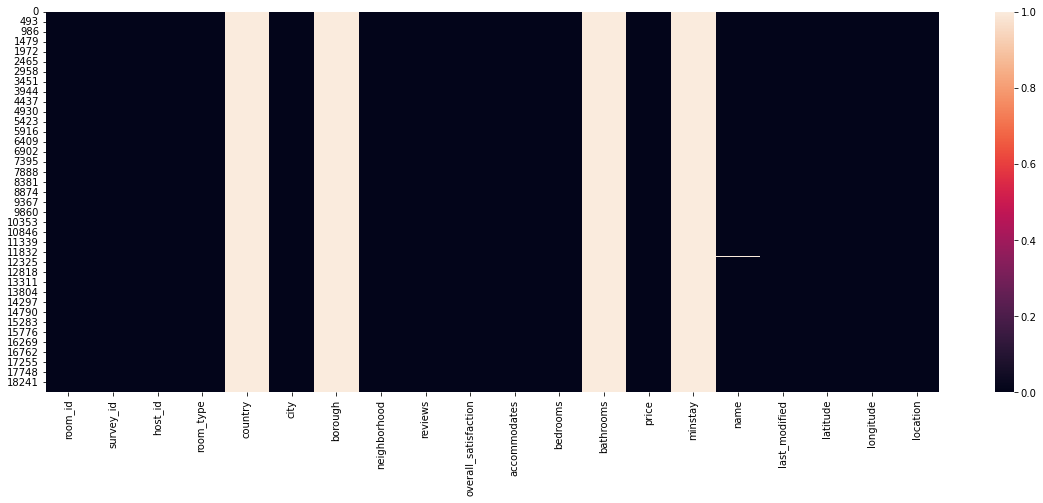

In [5]:
#looking for the missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(data.isnull(), vmin=0, vmax = 1)

### DATA CLEANING AND EDA

In [6]:
#dropping rows with missing values and irrelevant colummns

data.drop(['accommodates','borough','survey_id','minstay','country','bathrooms'],axis=1,inplace=True)

In [7]:
data['price'].describe()

count    18723.000000
mean       166.599477
std        108.943849
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

In [8]:
# filtering the dataset to within 95pct price confidence interval

ci_95=(data['price'].std())*2 + (data['price'].mean())

data=data[data['price'] <= ci_95]

In [9]:
data['bedrooms'].value_counts()

1.0     11038
2.0      4298
3.0      1282
0.0      1145
4.0       364
5.0        30
6.0         6
8.0         1
10.0        1
7.0         1
Name: bedrooms, dtype: int64

In [10]:
#dropping rows with no bedroom

filt=data[data['bedrooms']==0].index
data.drop(filt,inplace=True)

In [11]:
# taking a look at the overall satisfaction count

data['overall_satisfaction'].value_counts()

5.0    7050
0.0    5194
4.5    4148
4.0     517
3.5      95
3.0      15
1.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [12]:
data['overall_satisfaction'].describe()

count    17021.000000
mean         3.311439
std          2.210634
min          0.000000
25%          0.000000
50%          4.500000
75%          5.000000
max          5.000000
Name: overall_satisfaction, dtype: float64

In [13]:
#replacing zero value with average value

data['overall_satisfaction'].replace(0,4.5,inplace=True)
data['overall_satisfaction'].value_counts()

4.5    9342
5.0    7050
4.0     517
3.5      95
3.0      15
1.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [14]:
df1=pd.pivot_table(data,index='room_type',values='price',aggfunc='mean')
df1

,price
room_type,
Entire home/apt,169.875524
Private room,105.000296
Shared room,92.721311


array([<AxesSubplot:ylabel='price'>], dtype=object)

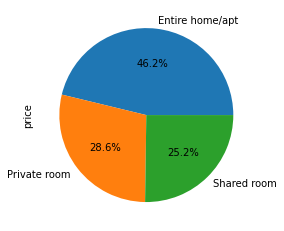

In [15]:
df1.plot(kind='pie',legend=None,subplots=True,autopct='%1.1f%%')

In [16]:
data.drop(['room_id','host_id','name','last_modified','latitude','longitude','location','city','neighborhood'],axis=1,inplace=True)
data

,room_type,reviews,overall_satisfaction,bedrooms,price
0,Shared room,7,4.5,1.0,156.0
1,Shared room,45,4.5,1.0,126.0
2,Shared room,1,4.5,1.0,132.0
3,Shared room,7,5.0,1.0,121.0
4,Shared room,1,4.5,1.0,93.0
...,...,...,...,...,...
18718,Private room,10,5.0,1.0,32.0
18719,Private room,6,5.0,1.0,24.0
18720,Private room,0,4.5,1.0,38.0
18721,Private room,13,4.5,1.0,36.0


In [17]:
dummies = pd.get_dummies(data.room_type)
dummies.head(3)

,Entire home/apt,Private room,Shared room
0,0,0,1
1,0,0,1
2,0,0,1


In [18]:
data = pd.concat([data,dummies],axis='columns')
data.head(3)

,room_type,reviews,overall_satisfaction,bedrooms,price,Entire home/apt,Private room,Shared room
0,Shared room,7,4.5,1.0,156.0,0,0,1
1,Shared room,45,4.5,1.0,126.0,0,0,1
2,Shared room,1,4.5,1.0,132.0,0,0,1


In [19]:
data.drop(['room_type','Entire home/apt'],axis='columns',inplace=True)
data.head(3)

,reviews,overall_satisfaction,bedrooms,price,Private room,Shared room
0,7,4.5,1.0,156.0,0,1
1,45,4.5,1.0,126.0,0,1
2,1,4.5,1.0,132.0,0,1


In [20]:
X = data.drop('price',axis='columns')
X

,reviews,overall_satisfaction,bedrooms,Private room,Shared room
0,7,4.5,1.0,0,1
1,45,4.5,1.0,0,1
2,1,4.5,1.0,0,1
3,7,5.0,1.0,0,1
4,1,4.5,1.0,0,1
...,...,...,...,...,...
18718,10,5.0,1.0,1,0
18719,6,5.0,1.0,1,0
18720,0,4.5,1.0,1,0
18721,13,4.5,1.0,1,0


### DATA PREPROCESSING AND MODELLING

In [21]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score


In [22]:
X = data.drop('price',axis='columns')
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

### using linear regression model

In [23]:


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [24]:
kf =KFold(5, shuffle=True, random_state=1)

In [25]:
mse=cross_val_score(linear_model, X_train,y_train,cv=kf, scoring= 'neg_mean_squared_error')

In [26]:
mse_mean=np.mean(mse)
print(mse_mean)

-3081.1008325667995


### using ridge regression model

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [28]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-5907.683645872657


### using lassso regression model

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-3081.021286134389
